In [1]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('/content/winequality-white.csv', delimiter = ";")

1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


from matplotlib import pyplot as plt
_df_0['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

2. Illustrate the correlation matrix of all features and the target.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<Axes: >

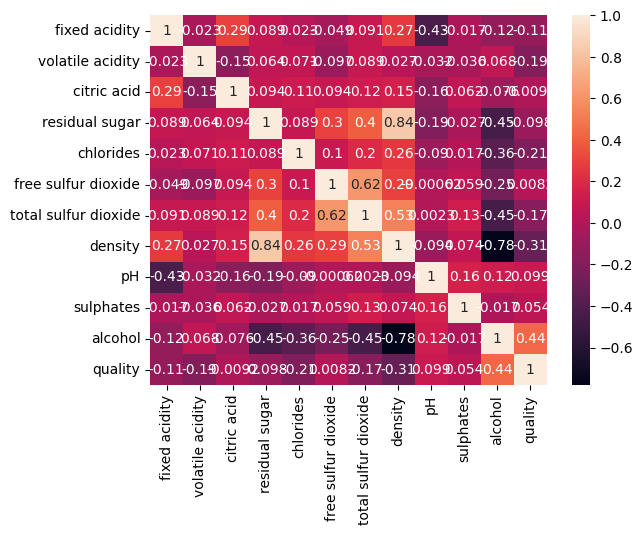

In [4]:
matrix = wine_data.corr()
print(matrix)
sns.heatmap(matrix, annot=True)

3. Plot a histogram of the target value (quality).


Axes(0.125,0.11;0.775x0.77)


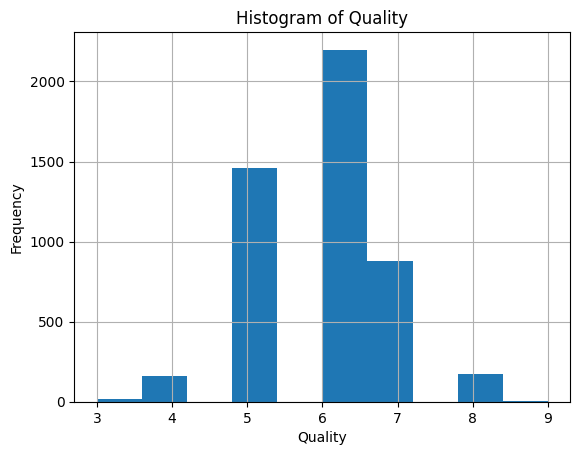

In [5]:
qual_hist = wine_data['quality'].hist()
qual_hist.set_xlabel('Quality')
qual_hist.set_ylabel('Frequency')
qual_hist.set_title('Histogram of Quality')
print(qual_hist)


4. Illustrate the violin plots of all features. Make sure that each plot is visible.

<Axes: >

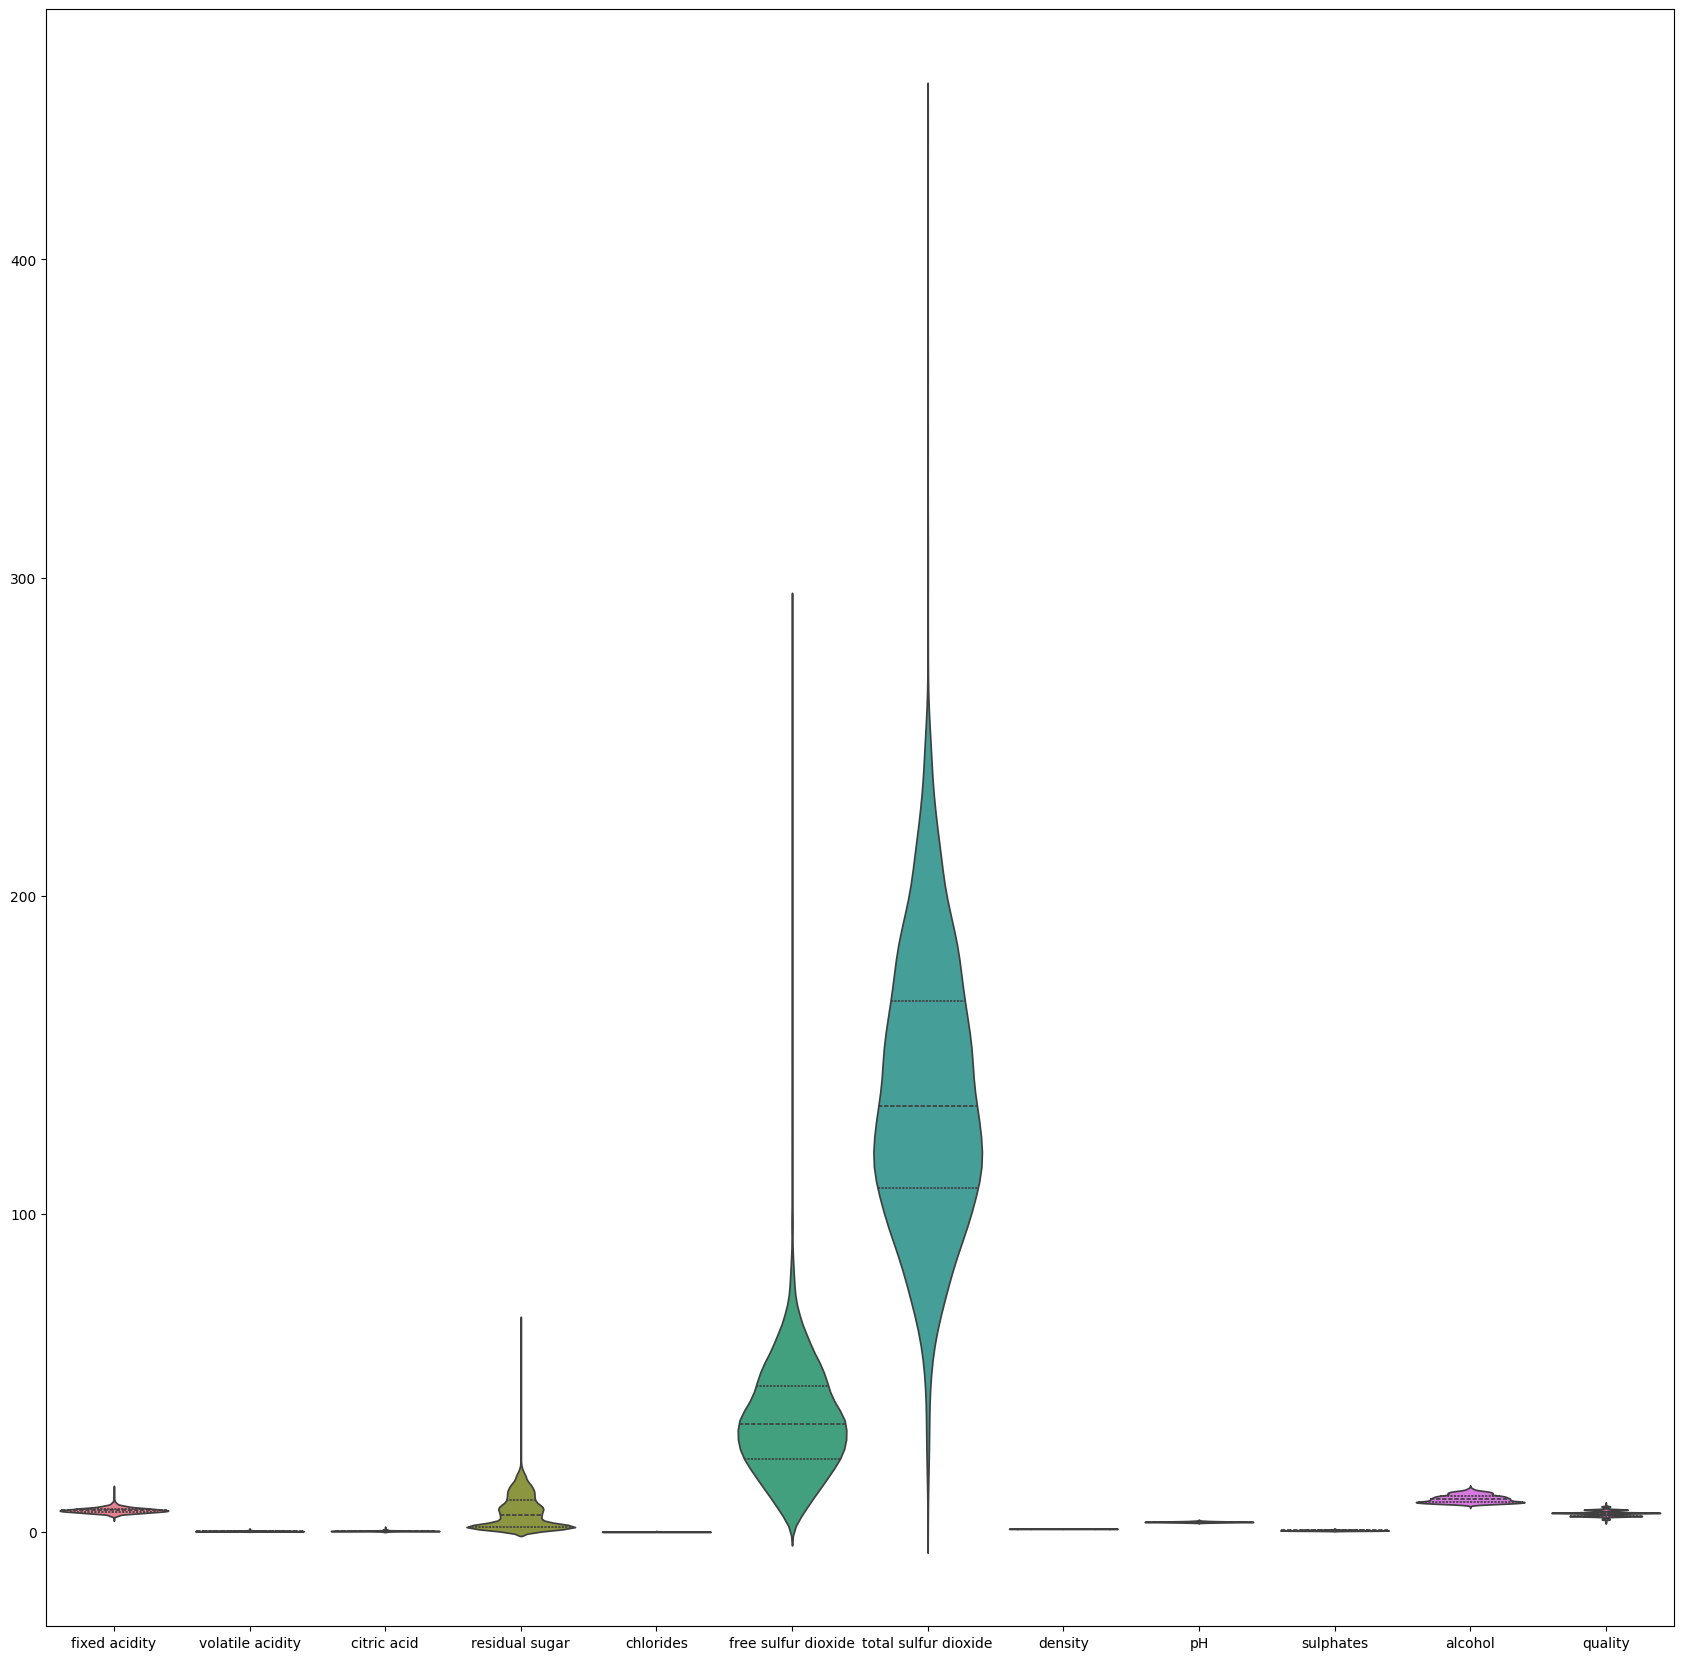

In [21]:
plt.figure(figsize=(21,21))
sns.violinplot(data=wine_data, inner='quart')

5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.



Intercept = [2.5820094]
Coefficient = [0.3134693]
RMSE = 0.7971284628753889
R^2 = 0.1897253327492563


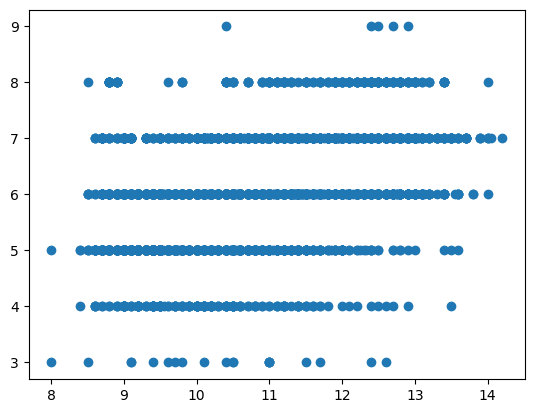

In [30]:
plt.scatter(wine_data['alcohol'], wine_data['quality'])
model = LinearRegression()
model.fit(wine_data[['alcohol']], wine_data[['quality']])
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')
fitted = model.predict(wine_data[['alcohol']])
RMSE = np.sqrt(mean_squared_error(wine_data['quality'], fitted))
print(f'RMSE = {RMSE}')
R2 = r2_score(wine_data['quality'], fitted)
print(f'R^2 = {R2}')

6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.



In [35]:
from operator import mod
model = LinearRegression()
model.fit(wine_data[['volatile acidity', 'alcohol', 'density']], wine_data[['quality']])
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')
fitted = model.predict(wine_data[['volatile acidity', 'alcohol', 'density']])
RMSE = np.sqrt(mean_squared_error(wine_data['quality'], fitted))
print(f'RMSE = {RMSE}')
R2 = r2_score(wine_data['quality'], fitted)
print(f'R^2 = {R2}')

Intercept = [-36.49861131]
Coefficient = [-2.07211594  0.39889282 38.99188669]
RMSE = 0.76848726881725
R^2 = 0.24690635619896484
